# 핸즈온 머신러닝

## 챕터 6

### 결정 트리

In [6]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
# 결정 트리(decision tree)
# : 분류, 회기 및 다중 출력 가능 머신러닝 알고리즘
#   복잡한 데이터셋 학습 가능한 강력한 알고리즘
#   랜덤 포레스트의 기본 구성 요소

# CART 훈련 알고리즘
# - 트리에 규제를 가하는 방법 & 회귀 문제에 적용하는 방법 학습

# 붓꽃 데이터셋에 DecisionTreeClassifier 훈련 코드
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

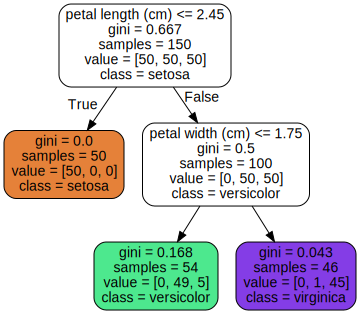

In [5]:
# export_graphviz() : 훈련된 결정 트리 시각화 함수
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

# conda install graphviz

In [10]:
# 길이 5, 너비 1.5
tree_clf.predict_proba([[5, 1.5]])
# >>> array([[0.        , 0.90740741, 0.09259259]])
# >>> [0], [1], [2] -> 0%, 90%, 9.3%

# Iris-Setosa 일 확률 : 0%
# Iris-Versicolor 일 확률 : 90%
# Iris-Virginica 일 확률 : 9.3%

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([1])

In [11]:
# 규제 매개변수
# min_samples_split(노드의 최소 샘플 수)
# min_samples_leaf(리프 노드의 최소 샘플 수)
# min_weight_fraction_leaf(가중치가 부여된 전체 샘플 수에서의 비율)
# max_leaf_nodes(리프 노드의 최대 수)
# max_features(각 노드에서 분할에 사용할 특성의 최대 수)
# max_leaf_nodes(리프 노드의 최대 수)
# max_features(각 노드에서 분할에 사용할 특성의 최대 수)

# >>> min웅앵 증가 or max 웅앵 감소 -> 규제 커지고 -> 과대적합 위험 감소

#### 회귀

In [16]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)